# (Ford GoBike System Data)
## by (Salma Gouda)

## Preliminary Wrangling

> This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

### Gathering Data

In [2]:
#Loading the dataset
df = pd.read_csv('fordgobike.csv')

### Assessing Data

In [3]:
#Exploring the dataset
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Cleaning Data

In [6]:
#Make a copy of the original df to work on
df0 = df.copy()

In [7]:
#Drop null values
df0.dropna(inplace=True)

In [8]:
#Drop columns unnecessary for analysis
df0.drop( columns = ['start_station_id', 'start_station_latitude', 'start_station_longitude', 
        'end_station_id', 'end_station_latitude', 'end_station_longitude'], inplace=True)

In [9]:
#Convert columns: start_time and end_time dtypes from object to datetime
df0['start_time'] = pd.to_datetime(df['start_time'])
df0['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
#Convert column: member_birth_year dtype from float to int
df0['member_birth_year'] = df0['member_birth_year'].astype(np.int64)

In [11]:
#Convert columns: user_type and member_gender dtypes to category
df0['user_type'] = df0['user_type'].astype('category')
df0['member_gender'] = df0['member_gender'].astype('category')

In [12]:
#Convert column: bike_id and dtype to str
df0['bike_id'] = df0['bike_id'].astype('str')

In [13]:
#Convert column: bike_share_for_all_trip dtype from object to bool
df0['bike_share_for_all_trip'] = (df0['bike_share_for_all_trip'] == 'Yes')

In [14]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  category      
 7   member_birth_year        174952 non-null  int64         
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  bool          
dtypes: bool(1), category(2), datetime64[ns](2), int64(2), object(3)
memory usage: 11.2+ MB


In [15]:
#Add column: age 
df0['age'] = 2019 - df0['member_birth_year']
df0.age.head()

0    35
2    47
3    30
4    45
5    60
Name: age, dtype: int64

In [16]:
#Add column: duration_min
df0['duration_min'] = df['duration_sec'] / 60

In [17]:
df0.sample(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
147713,571,2019-02-07 07:22:45.404,2019-02-07 07:32:16.472,Embarcadero BART Station (Beale St at Market St),Bryant St at 2nd St,2582,Subscriber,1990,Female,False,29,9.516667
121027,1279,2019-02-11 16:01:03.541,2019-02-11 16:22:22.759,Civic Center/UN Plaza BART Station (Market St ...,Dolores St at 15th St,4926,Customer,1996,Male,False,23,21.316667
106439,256,2019-02-13 18:14:45.179,2019-02-13 18:19:01.323,Harrison St at 17th St,16th St Mission BART,1699,Subscriber,1982,Female,False,37,4.266667
138870,109,2019-02-08 02:30:19.336,2019-02-08 02:32:09.029,Grove St at Divisadero,McAllister St at Baker St,4977,Customer,1980,Other,False,39,1.816667
106979,5937,2019-02-13 15:40:00.901,2019-02-13 17:18:58.579,3rd St at Townsend St,3rd St at Townsend St,1677,Customer,1981,Male,False,38,98.950000


In [18]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  category      
 7   member_birth_year        174952 non-null  int64         
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  bool          
 10  age                      174952 non-null  int64         
 11  duration_min             174952 non-null  float64       
dtypes: bool(1), cate

In [19]:
#Export clean df to a csv file
df0.to_csv('fordgobike-clean.csv', index=None)

In [20]:
#Read clean df
gobike = pd.read_csv('fordgobike-clean.csv')
gobike.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,False,35,869.750000
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,False,47,1030.900000
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,False,30,608.166667
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,True,45,26.416667
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,False,60,29.883333


### What is the structure of your dataset?

> After cleaning, there are 174,952 trips in the dataset with 13 columns ('duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age', 'month', 'duration_min'). Some variables are numeric in nature, while others are categorical.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are most related to trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that trip duration will be strongly influenced by features like: user type, age, gender, start, and end station. I also think that other features like the start and end time will help me in my investigation.

## Univariate Exploration

> In this section, I will investigate distributions of individual variables in order to prepare to look at relationships between variables later on.

#### How long does the average trip take?

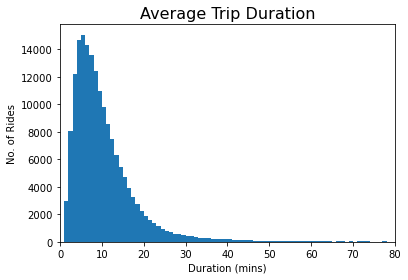

In [21]:
base_color = sb.color_palette()[0]

bins = np.arange(0, gobike['duration_min'].max()+1,1)

plt.hist(data=gobike, x='duration_min', color=base_color, bins= bins)

plt.title('Average Trip Duration', fontsize = 16)
plt.xlabel('Duration (mins)')
plt.xlim(0,80)
plt.ylabel('No. of Rides');

The plot suggests that most trips range from 8 to 12 mins, the plot is also right skewed with long tail suggesting some outliers in the duration.

#### How many subscribers to customers do we have?

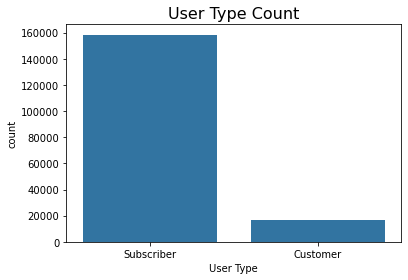

In [22]:
base_color = sb.color_palette()[0]

order = gobike['user_type'].value_counts().index

sb.countplot(data=gobike, x='user_type', color = base_color, order = order)

plt.xlabel('User Type')
plt.title('User Type Count', fontsize = 16);

It's obvious in the plot that the number of  Subscribers (+14k) is way larger than the number of Customers (2k).

#### What's the distribution of different ages?

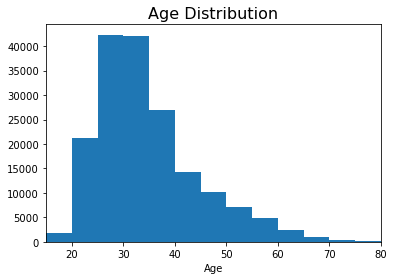

In [23]:
base_color = sb.color_palette()[0]

bins = np.arange(0, gobike['age'].max()+5,5)

plt.hist(data=gobike, x='age', color=base_color, bins= bins)

plt.title('Age Distribution', fontsize = 16)
plt.xlabel('Age')
plt.xlim(15,80);

The plot is rightly skewed with a peak around 25 to 35 ages.

#### Which gender has the highest count?

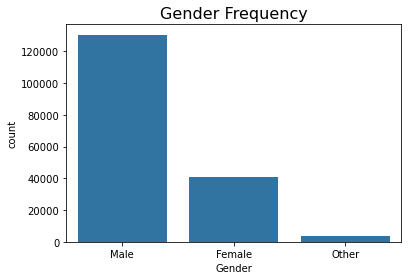

In [24]:
base_color = sb.color_palette()[0]

order = gobike['member_gender'].value_counts().index

sb.countplot(data=gobike, x='member_gender', color = base_color, order = order)

plt.xlabel('Gender')
plt.title('Gender Frequency', fontsize = 16);

The plot suggests a higher contribution of males than females.

#### How often was the bike share system used?

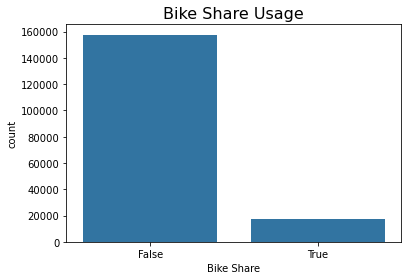

In [25]:
base_color = sb.color_palette()[0]

order = gobike['bike_share_for_all_trip'].value_counts().index

sb.countplot(data=gobike, x='bike_share_for_all_trip', color = base_color, order = order)

plt.xlabel('Bike Share')
plt.title('Bike Share Usage', fontsize = 16);

The plot implies that only a small portion of users actualley used the bike share system.

#### What are the top start and end stations?

In [26]:
#Select top 5 stations
top_start = gobike['start_station_name'].value_counts().index[:5]

top_end = gobike['end_station_name'].value_counts().index[:5]

In [27]:
#Creat a df with top stations
top_start_df = gobike.loc[gobike['start_station_name'].isin(top_start)]

top_end_df = gobike.loc[gobike['end_station_name'].isin(top_end)]

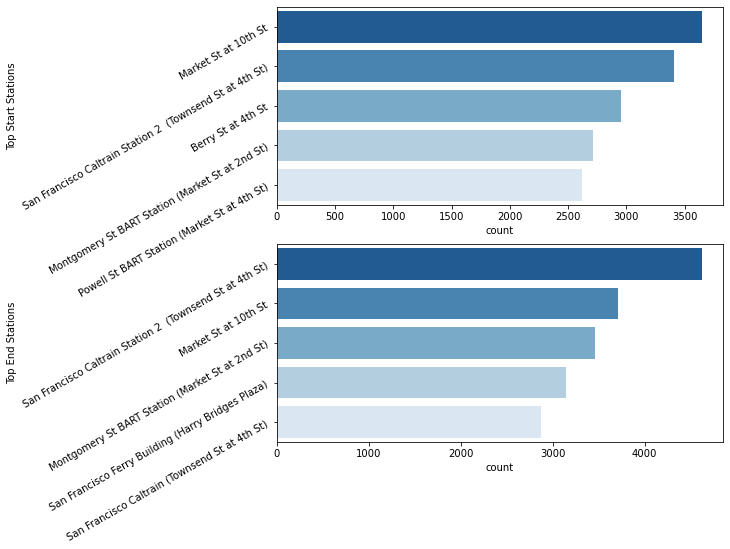

In [28]:
plt.figure(figsize=[8,8])

plt.subplot(2, 1, 1)
order1 = top_start_df['start_station_name'].value_counts().index
sb.countplot(data = top_start_df, y = 'start_station_name', palette = 'Blues_r', order=order1)
plt.ylabel('Top Start Stations')
plt.yticks(rotation = 30)

plt.subplot(2, 1, 2)
order2 = top_end_df['end_station_name'].value_counts().index
sb.countplot(data = top_end_df, y = 'end_station_name', palette = 'Blues_r', order=order2)
plt.ylabel('Top End Stations')
plt.yticks(rotation = 30);

San Francisco Caltrain Station 2 is the top 1 favorite destination.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the distribution were expected, but I also commented on each plot individually.
I didn't need to perform any scale transformations thus far.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I found the distribution for the bike share system to be unusual with more users not using it.
Before starting my EDA, I did some adjustements to the data, these adjustments include:
- Dropping columns unnecessary for analysis.
- Adding new columns useful for analysis (duration in minuts, age)
- Changing some data types to further aid my investigation.
- Creating separate dfs to find out the top start and end stations.

All my adjustments were for the purpose of cleaning the data and making it ready for analysis.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data. The variables that I cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### How does the trip duration depend on user type?

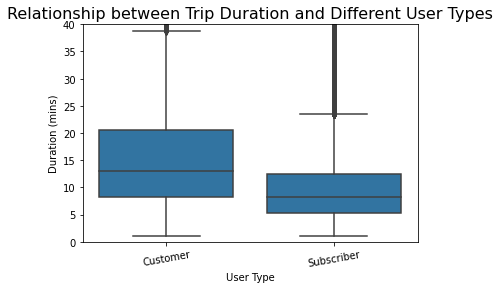

In [29]:
base_color = sb.color_palette()[0]

sb.boxplot(data= gobike, x='user_type', y='duration_min', color=base_color)
plt.xlabel('User Type')
plt.xticks(rotation = 10)
plt.ylabel('Duration (mins)')
plt.ylim(0,40)
plt.title('Relationship between Trip Duration and Different User Types', fontsize = 16);

The boxplot shows that Customers have a wider range of trip durations, hence, the median of a Subscriber's trip duration is lower than the median of a Customer's trip duration. Points above whiskers in both boxplots suggest indidvidual outliers.

#### Is there a relationship between trip duration and gender?

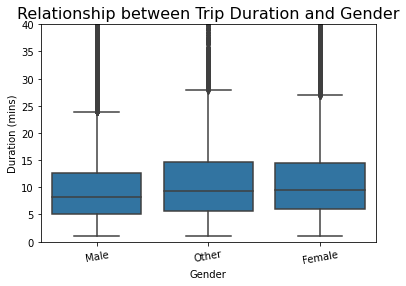

In [30]:
base_color = sb.color_palette()[0]

sb.boxplot(data= gobike, x='member_gender', y='duration_min', color=base_color)
plt.xlabel('Gender')
plt.xticks(rotation = 10)
plt.ylabel('Duration (mins)')
plt.ylim(0,40)
plt.title('Relationship between Trip Duration and Gender', fontsize = 16);

The boxplot indicate that females have a slightly wider range of trip durations, hence, the median of Female rides is slightly higher than than of male rides.

#### What's the count of each gender in different user types?

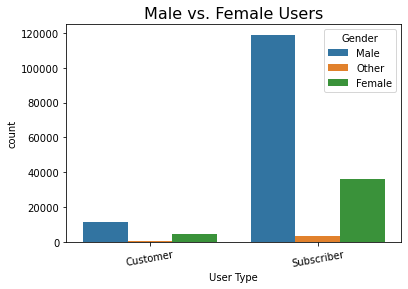

In [31]:
sb.countplot(data=gobike, x='user_type', hue='member_gender')
plt.xlabel('User Type')
plt.xticks(rotation=10)
plt.legend(title='Gender')
plt.title('Male vs. Female Users', fontsize = 16);

The bar plot shows that male count is much more higher than female count in both user types, which explains the higher male trip counts in previous section (univaraiate exploration).

#### What's the correlation between trip duration and age?

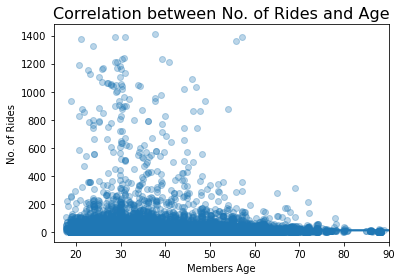

In [32]:
sb.regplot(data=gobike, x='age', y='duration_min', x_jitter= 0.3, scatter_kws= {'alpha' : 0.3})
plt.xlim(15,90)
plt.xlabel('Members Age')
plt.ylabel('No. of Rides')
plt.title('Correlation between No. of Rides and Age', fontsize = 16);

The plot shows higher trip durations around ages ranging from 20 to 40, with 30 being the highest. But no obvoius correlation.

#### What's the age distribution among different users?

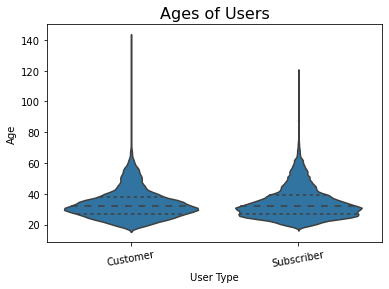

In [33]:
base_color = sb.color_palette()[0]

sb.violinplot(data= gobike, x='user_type', y='age', color=base_color, inner = 'quartile')
plt.xlabel('User Type')
plt.xticks(rotation = 10)
plt.ylabel('Age')
plt.title('Ages of Users', fontsize = 16);

The violin plot shows that most users are around the age of 30, which makes the correlation in the previous scatter plot more logical.

#### What does the relation between trip duration and top start stations look like?

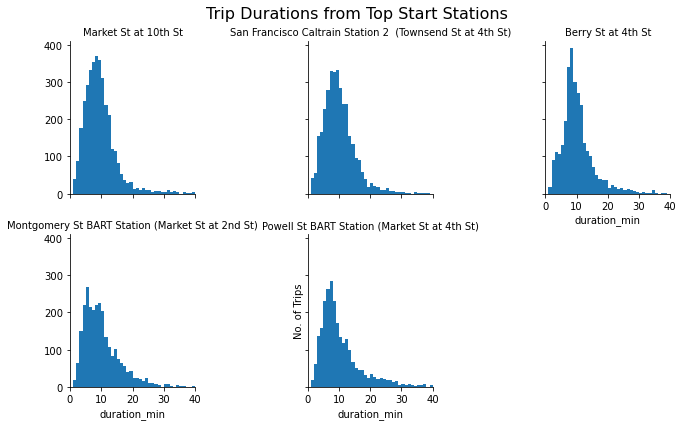

In [34]:
bins = np.arange(0, gobike['duration_min'].max()+1,1)

order = top_start_df['start_station_name'].value_counts().index

g = sb.FacetGrid(data=top_start_df, col='start_station_name', col_wrap=3, col_order= order)
g.map(plt.hist, 'duration_min', bins=bins)
g.set_titles('{col_name}')
plt.xlim(0,40)
plt.ylabel('No. of Trips')
g.fig.suptitle('Trip Durations from Top Start Stations', fontsize=16)
plt.subplots_adjust(top=0.9, wspace=0.9);

The plots show that the no. of rides in regard to start station is Berry St > Market St > San Francisco Caltrain Station 2 > Powell St > Montgomery St.

#### What does the relation between trip duration and top end stations look like?

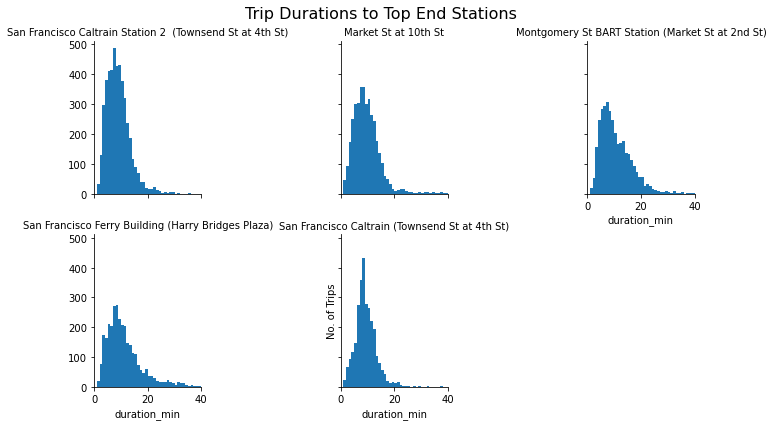

In [35]:
bins = np.arange(0, gobike['duration_min'].max()+1,1)

order = top_end_df['end_station_name'].value_counts().index

g = sb.FacetGrid(data=top_end_df, col='end_station_name', col_wrap=3, col_order= order)
g.map(plt.hist, 'duration_min', bins=bins)
g.set_titles('{col_name}')
plt.xlim(0,40)
plt.ylabel('No. of Trips')
g.fig.suptitle('Trip Durations to Top End Stations', fontsize = 16)
plt.subplots_adjust(top=0.9, wspace=1.3);

The plots show that the no. of rides in regard to end station is  San Francisco Caltrain Station 2 > San Francisco Caltrain > Market > Montgomery St > San Francisco Ferry Building.

From the two previous FacetGrids, we can clearly comprehend that the order of trip durations from and to top stations is different from that of the no. of trips (count).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The bivariate exploration showed some logical relationships that I didn't have in mind before analysis. After looking through relationships between different features, some of the facts are:

- There are higher contributions of the male gender because the user in this dataset are mostly males.
- The larger no. of trips and trip durations belong to people around 30 as most users in the dataset are around this age.
- The most frequent stations in the dataset has no obviuos relationship with trip durations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
It is quite interesting that males are way more active than females in this Ford GoBike dataset.

## Multivariate Exploration

> In this section, I will create plots of three or more variables to investigate the data even
further. 

#### How does the no. of trips relate to age and gender?

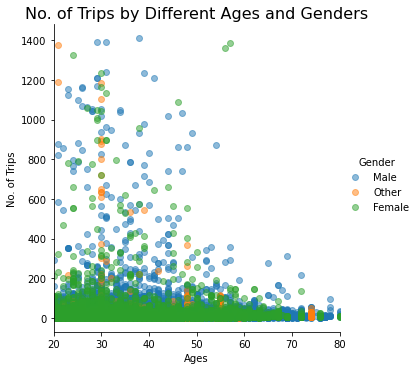

In [36]:
g = sb.FacetGrid(data=gobike, hue= 'member_gender', height=5)
g.map(plt.scatter, 'age', 'duration_min', alpha=0.5)
g.add_legend(title='Gender')
plt.xlabel('Ages')
plt.xlim(20,80)
plt.ylabel('No. of Trips')
plt.title('No. of Trips by Different Ages and Genders', fontsize=16);

The plot shows how the number of trips decrease as one gets older. It also peaks around the age of thirty for all genders.

#### How does the no. of trips change among users of different ages?

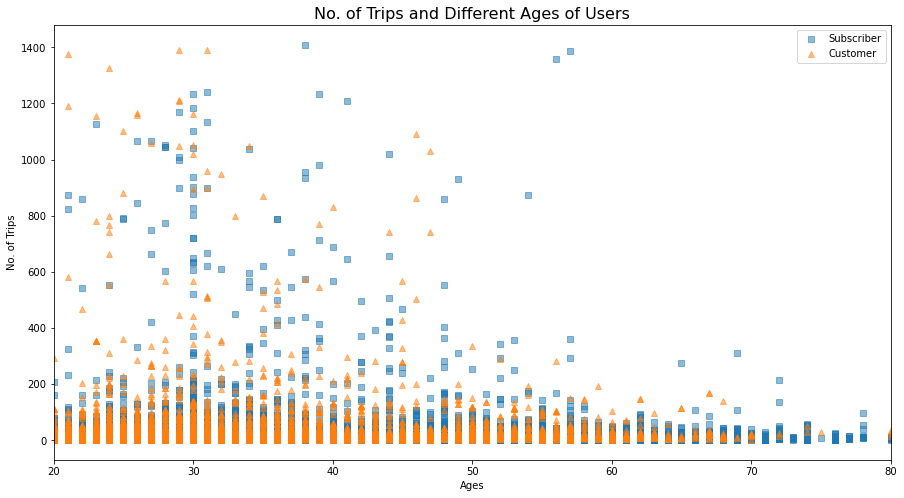

In [37]:
plt.figure(figsize=[15,8])

cat_markers = [['Subscriber', 's'],['Customer', '^']]
               
for cat, marker in cat_markers:
               gobike_cat = gobike[gobike['user_type'] == cat]
               plt.scatter(data=gobike_cat, x='age', y='duration_min', marker=marker, alpha=0.5)
               plt.legend(['Subscriber','Customer'])
plt.xlabel('Ages')
plt.xlim(20,80)
plt.ylabel('No. of Trips')
plt.title('No. of Trips and Different Ages of Users', fontsize=16);

The plot clearly shows that subscribers tend to be more consistent as they get older, despite the decrease in the number of trips they take.

#### How often do different genders head to top destinations?

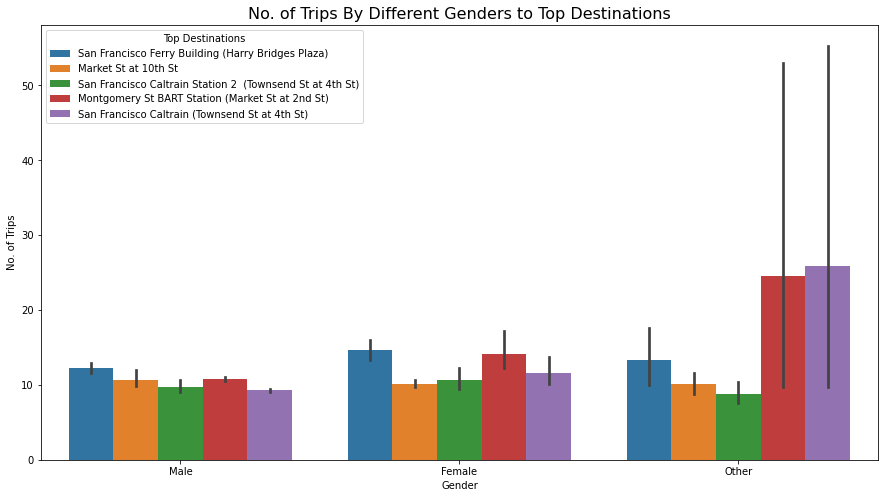

In [38]:
plt.figure(figsize=[15,8])

sb.barplot(data=top_end_df, x='member_gender', y='duration_min', hue='end_station_name')

plt.xlabel('Gender')
plt.ylabel('No. of Trips')
plt.legend(title='Top Destinations')
plt.title('No. of Trips By Different Genders to Top Destinations', fontsize=16);

The plot shows slight variations that don't have any outstanding indication.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The number of trips decreases as age increases, with a peak around the age of 30.
- Subscribers are more consistent than customers as they both get older.
- San Fransisco Ferry Building Station has the most frequent trips taken by all genders.

### Were there any interesting or surprising interactions between features?

- The multivariate exploration further strenghthes the previous bivariate and univariate explorations.